# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Usually we don't want to load a dataset from the programming library - rather
# the dataset comes from our company that has collected some real world data
from sklearn import datasets
# Split dataset into 2 sections - trainind, tesing (no answers given)
from sklearn.model_selection import train_test_split
# Imports machine learning algorithm (kNN)
from sklearn.neighbors import KNeighborsClassifier
# We could hard code Decision Tree with if-statements using boolean conditions (E.g. is texture smooth or bumpy?)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### As you can see the dataset is in the form of an object similar to a `dictionay`. What are the `keys` of the dictionary?

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### To have better understanding of the dataset, let's print it in tabular form.

In [5]:

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names']) 
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Figure below illustrates the features and target labels for iris dataset. 

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/iris.png" width="500" hight="300" />

#### What is the value of the key `data`? Assign the value to a variable `X`

In [6]:
X = iris["data"]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### What is the `shape` of `X`?

In [7]:
print(X.shape)

(150, 4)


#### What is the value of the key `target`? Assign the value to a variable `y`

In [8]:
y = iris["target"]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### What is the `shape` of `y`?

In [9]:
print(y.shape)

(150,)


#### What is the value of the key `target_names`? Assign the value to a variable `target_names`

In [10]:
target_names = iris["target_names"]
print(target_names)

['setosa' 'versicolor' 'virginica']


#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`

In [11]:
feature_names = iris["feature_names"]
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Exploring and looping through the dataset

#### Print the 5th datapoint in your dataset `X`

In [12]:
fifth_row = X[4]
print(fifth_row)

[5.  3.6 1.4 0.2]


#### Print the features and target label of flower 1 to 5.

In [13]:
first_five_features = X[:5]
first_five_targets = y[:5]
print(first_five_features)
print(first_five_targets)

# print(X.head()) # Cannot use head() in this case because we are not working with a Pandas DataFrame

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`

In [14]:
# Try with a list comprehension
# Any calculation before the for keyword is calculated and appended to the end of the sepal_area array
# We can use for ... in loop within list coprehension to loop over rows of the 2D dataset X
# row now contains 1 flower, and at idnex 0, the variable row contains the sepal width
sepal_area = [ row[0] * row[1] for row in X ]
print(sepal_area)

petal_area = [ row[2] * row[3] for row in X ]
print(petal_area)

[np.float64(17.849999999999998), np.float64(14.700000000000001), np.float64(15.040000000000001), np.float64(14.26), np.float64(18.0), np.float64(21.060000000000002), np.float64(15.639999999999999), np.float64(17.0), np.float64(12.76), np.float64(15.190000000000001), np.float64(19.980000000000004), np.float64(16.32), np.float64(14.399999999999999), np.float64(12.899999999999999), np.float64(23.2), np.float64(25.080000000000002), np.float64(21.060000000000002), np.float64(17.849999999999998), np.float64(21.66), np.float64(19.38), np.float64(18.36), np.float64(18.87), np.float64(16.56), np.float64(16.83), np.float64(16.32), np.float64(15.0), np.float64(17.0), np.float64(18.2), np.float64(17.68), np.float64(15.040000000000001), np.float64(14.879999999999999), np.float64(18.36), np.float64(21.32), np.float64(23.1), np.float64(15.190000000000001), np.float64(16.0), np.float64(19.25), np.float64(17.64), np.float64(13.200000000000001), np.float64(17.34), np.float64(17.5), np.float64(10.35), np

#### Find the `max`, `min`, `mean` and `median` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions.

In [15]:
# Get the values for sepal length
max_sepal_length = np.max(X[:, 0])
print("Max sepal length:", max_sepal_length)

min_sepal_length = np.min(X[:, 0])
print("Min sepal length:", min_sepal_length)

mean_sepal_length = np.mean(X[:, 0])
print("Mean sepal length:", mean_sepal_length)

median_sepal_length = np.median(X[:, 0])
print("Median sepal length:", median_sepal_length)

# Get the values for sepal width
max_sepal_width = np.max(X[:, 1])
print("Max sepal width:", max_sepal_width)

min_sepal_width = np.min(X[:, 1])
print("Min sepal width:",min_sepal_width)

mean_sepal_width = np.mean(X[:, 1])
print("Mean sepal width:",mean_sepal_width)

median_sepal_width = np.median(X[:, 1])
print("Median sepal width:",median_sepal_width)

# Using this syntax, we can get the max values for all of the columns at once - using the axis 
# named paramater to specify calculating the max along the vertical axis
print("All max feature values:", np.max(X, axis=0))

min_sepal_length_b = np.min(X, axis=0)[0]
print("Min sepal length (axis-version):", min_sepal_length_b)

min_sepal_width_b = np.min(X, axis=0)[1]
print("Min sepal width (axis-version):", min_sepal_width_b)

# Petal length values
max_petal_length = np.max(X, axis=0)[2]
print("Max petal length:", max_petal_length)

min_petal_length = np.min(X, axis=0)[2]
print("Min petal length:", min_petal_length)

mean_petal_length = np.mean(X, axis=0)[2]
print("Mean petal length:", mean_petal_length)

median_petal_length = np.median(X, axis=0)[2]
print("Median petal length:", median_petal_length)

# Get petal width values
max_petal_width = np.max(X, axis=0)[3]
print("Max petal width:", max_petal_width)

min_petal_width = np.min(X, axis=0)[3]
print("Min petal width:", min_petal_width)

# Get the mean of the petal width using both syntaxes:
# 2D list slicing:
mean_petal_width = np.mean(X[:, 3])
print("Mean petal width (list slicing):", mean_petal_width)

# Over an axis:
mean_petal_width_b = np.mean(X, axis=0)[3]
print("Mean petal width (axis):", mean_petal_width_b)

median_petal_width = np.median(X, axis=0)[3]
print("Median petal width:", median_petal_width)


Max sepal length: 7.9
Min sepal length: 4.3
Mean sepal length: 5.843333333333334
Median sepal length: 5.8
Max sepal width: 4.4
Min sepal width: 2.0
Mean sepal width: 3.0573333333333337
Median sepal width: 3.0
All max feature values: [7.9 4.4 6.9 2.5]
Min sepal length (axis-version): 4.3
Min sepal width (axis-version): 2.0
Max petal length: 6.9
Min petal length: 1.0
Mean petal length: 3.7580000000000027
Median petal length: 4.35
Max petal width: 2.5
Min petal width: 0.1
Mean petal width (list slicing): 1.1993333333333336
Mean petal width (axis): 1.199333333333334
Median petal width: 1.3


# Plotting the data

#### `Box plot` of all features

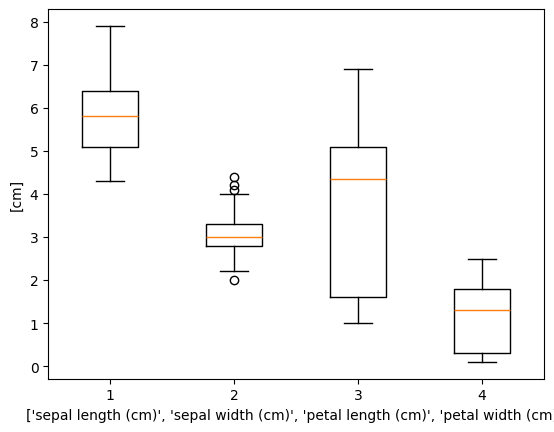

In [16]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Histogram of each feature

#### Plot the histogram of each feature. 

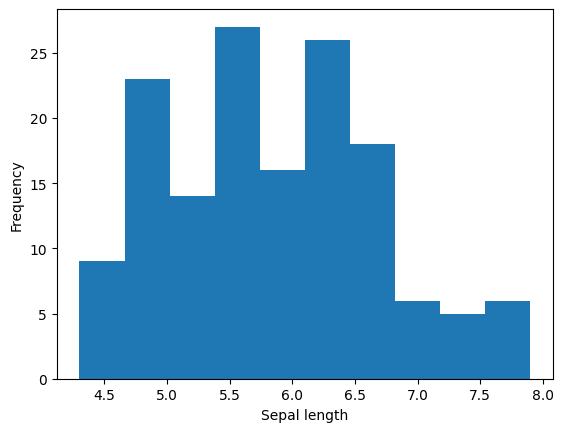

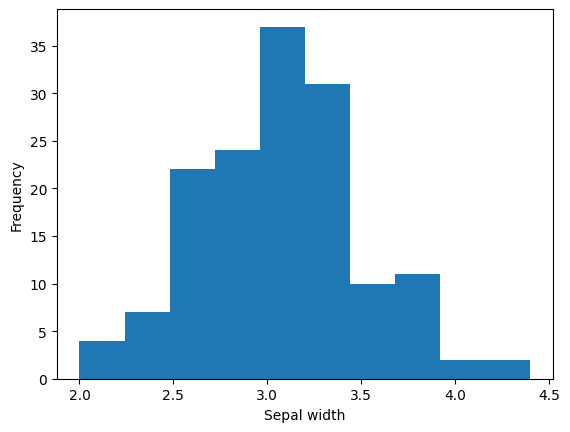

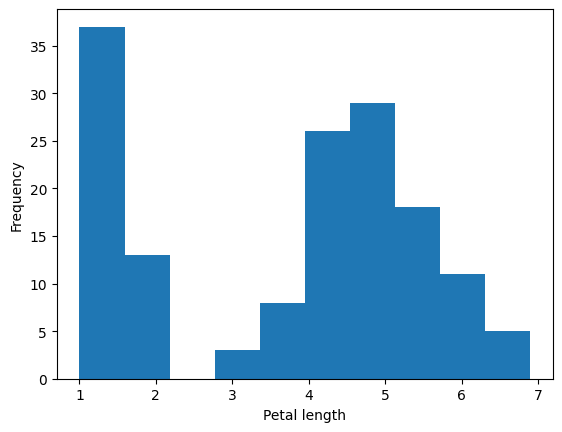

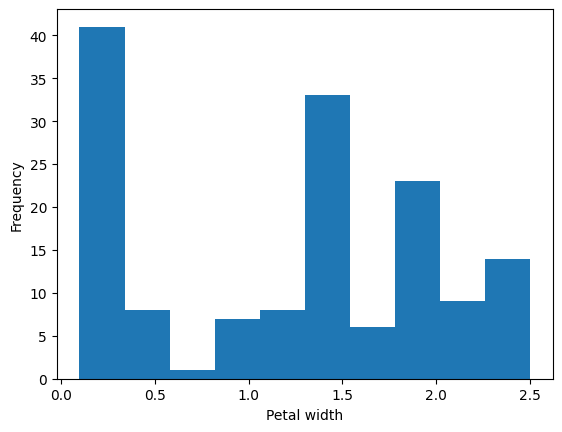

In [17]:
#your code here
plt.figure()
# X below refers to the 2D dataset of features for all rows
# Sepal length
plt.hist(X[:, 0])
# The x and y labels are referring to the x and y axes on the graph
plt.ylabel("Frequency")
plt.xlabel("Sepal length")
plt.show()

# Sepal width
plt.figure()
plt.hist(X[:, 1])
plt.ylabel("Frequency")
plt.xlabel("Sepal width")
plt.show()

# Petal length
plt.figure()
plt.hist(X[:, 2])
plt.ylabel("Frequency")
plt.xlabel("Petal length")
plt.show()

# Petal width
plt.figure()
plt.hist(X[:, 3])
plt.ylabel("Frequency")
plt.xlabel("Petal width")
plt.show()

#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features 
```python
(X[:,0], X[:,1]) 
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.
 

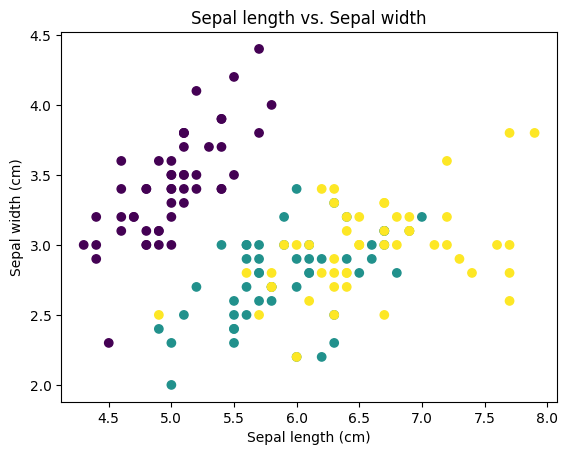

In [18]:
#your code here
# Plot the scatter plot comparing Sepal length vs. Sepal width
plt.figure()
plt.title("Sepal length vs. Sepal width")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.show()

(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

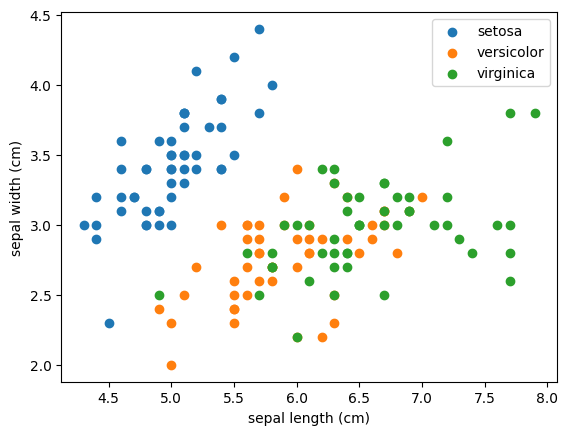

In [19]:
def plot_pair_with_legend(x1, x2, x1_label , x2_label, y):
    plt.figure()
    for i, target_name in enumerate(iris["target_names"]):
        plt.scatter(x1[y == i], x2[y == i], label=target_name)
    
    plt.xlabel(x1_label) 
    plt.ylabel(x2_label) 
    plt.legend()
    plt.show()

plot_pair_with_legend(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [20]:
def plot_pair(X1, X2, x1_label , x2_label, y):
    plt.figure()
    plt.title(x1_label + " vs. " + x2_label)
    plt.scatter(X1, X2, c=y)
    plt.ylabel(x2_label)
    plt.xlabel(x1_label) 
    plt.show()

#### Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

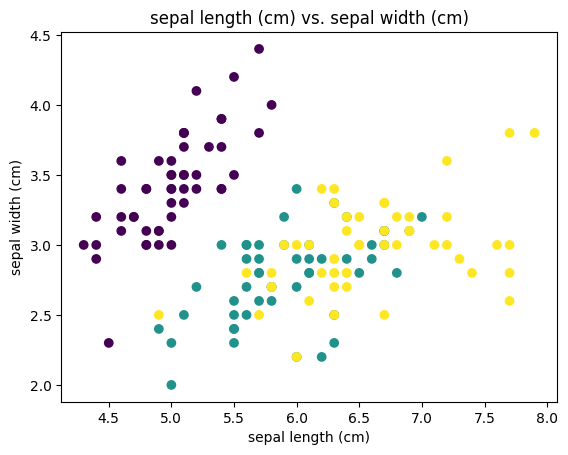

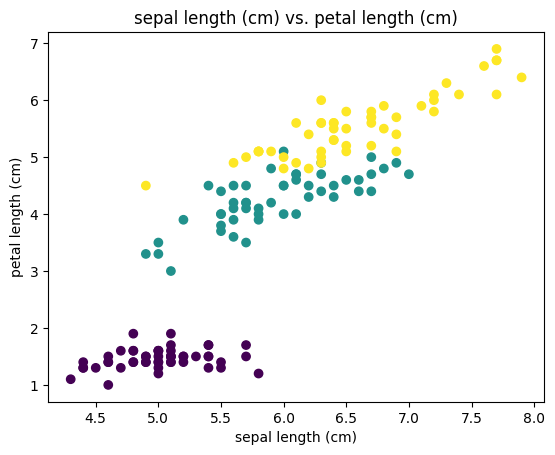

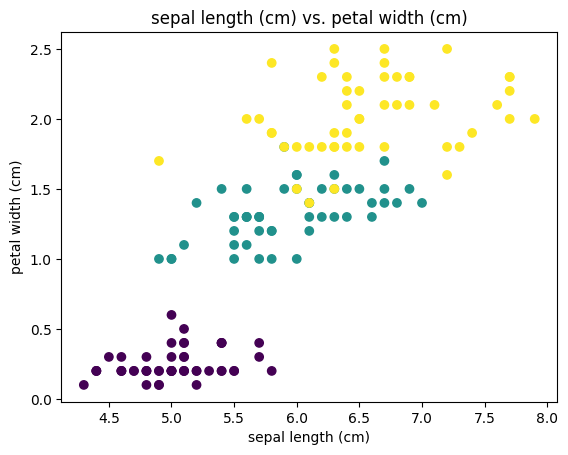

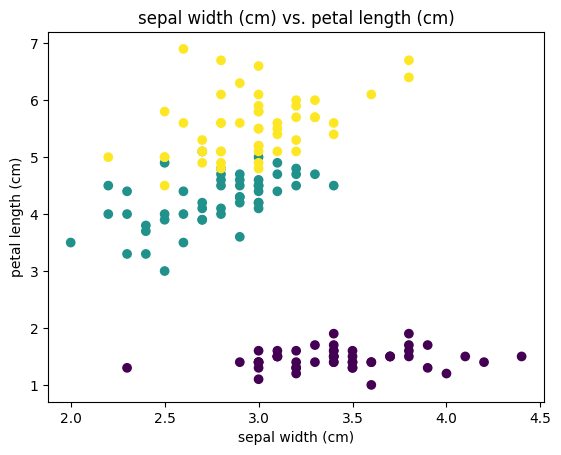

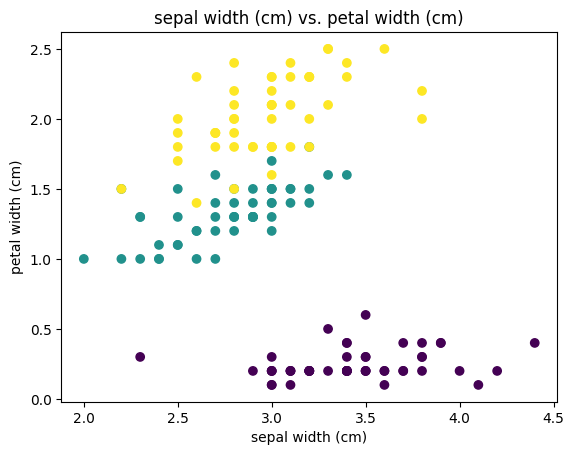

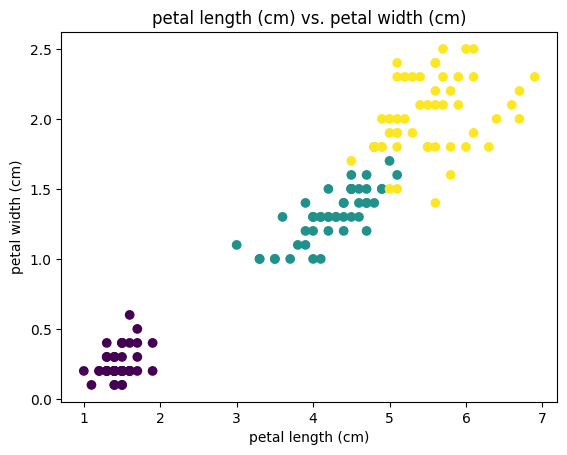

In [21]:
#your code here
plot_pair(X[:, 0], X[:, 1], feature_names[0], feature_names[1], y)
plot_pair(X[:, 0], X[:, 2], feature_names[0], feature_names[2], y)
plot_pair(X[:, 0], X[:, 3], feature_names[0], feature_names[3], y)
plot_pair(X[:, 1], X[:, 2], feature_names[1], feature_names[2], y)
plot_pair(X[:, 1], X[:, 3], feature_names[1], feature_names[3], y)
plot_pair(X[:, 2], X[:, 3], feature_names[2], feature_names[3], y)


# K Nearest Neighbors (KNN) 

## Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points. 

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

$
d(P_1, P_2) = \sqrt{(2 - 5)^2 + (2 - 5)^2}= \sqrt{18} \approx 4.2
$

We can calculate the distance between these two points.

In [22]:
P = np.array([2, 2])
Q = np.array([5, 5])
# Broadcasting - elementwise calculation on each element inside the array P IN ORDER with the array Q
distance = np.sqrt(np.sum((P - Q)**2))
print(distance)

4.242640687119285



#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [23]:
# Define two points in 3D space
P1 = np.array([1, 2, 3]) # flower 1
P2 = np.array([4, 0, 8]) # flower 2

# Calculate the Euclidean distance
# The formula in the broadcasting code stays EXACTLY THE SAME, just the number of dimensions can change
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


#### Write a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [24]:
def straight_line_distance(P, Q):
    distance = np.sqrt(np.sum((P - Q)**2))
    # print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')
    return distance

straight_line_distance(P1, P2)

np.float64(6.164414002968976)

## KNN Algorithm Steps

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/knn2.jpg" width="600" hight="100" /> 

# Implementing KNN 

### 0 - Look at the data - Splitting the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#### What is the `shape` of `X_train`, `X_test`, `y_train`, `y_test`?

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### 1 - Calculate distances

#### Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set. 

#### So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [27]:
test_flower = X_test[0]

# append the (index, distance) tuples to this list
distances = [(index, straight_line_distance(test_flower, X_train[index, :])) for index in range(len(X_train))] 
print(distances)

[(0, np.float64(0.5830951894845299)), (1, np.float64(0.640312423743285)), (2, np.float64(0.5656854249492381)), (3, np.float64(5.007993610219566)), (4, np.float64(3.354101966249685)), (5, np.float64(4.1085277168348275)), (6, np.float64(4.6141087980237305)), (7, np.float64(3.036445290137795)), (8, np.float64(0.7810249675906655)), (9, np.float64(3.1670175244226235)), (10, np.float64(2.9376861643136762)), (11, np.float64(1.4000000000000001)), (12, np.float64(3.5763109484495335)), (13, np.float64(3.807886552931954)), (14, np.float64(4.173727350941841)), (15, np.float64(0.30000000000000027)), (16, np.float64(0.4582575694955841)), (17, np.float64(0.17320508075688767)), (18, np.float64(4.844584605515729)), (19, np.float64(4.568369512200168)), (20, np.float64(4.230839160261236)), (21, np.float64(6.057227088363124)), (22, np.float64(0.632455532033676)), (23, np.float64(0.9219544457292886)), (24, np.float64(3.2186953878862163)), (25, np.float64(2.874021572639983)), (26, np.float64(2.3874672772626

#### Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [28]:
def calculate_distances(test_instance, X_train):
    distances = [(index, straight_line_distance(test_instance, X_train[index, :])) for index in range(len(X_train))] 
    return distances

#### What you pass as `input` to the function `calculate_distances`? What you get as `output` when you call this function?

In [29]:
calculate_distances(test_flower, X_train)

[(0, np.float64(0.5830951894845299)),
 (1, np.float64(0.640312423743285)),
 (2, np.float64(0.5656854249492381)),
 (3, np.float64(5.007993610219566)),
 (4, np.float64(3.354101966249685)),
 (5, np.float64(4.1085277168348275)),
 (6, np.float64(4.6141087980237305)),
 (7, np.float64(3.036445290137795)),
 (8, np.float64(0.7810249675906655)),
 (9, np.float64(3.1670175244226235)),
 (10, np.float64(2.9376861643136762)),
 (11, np.float64(1.4000000000000001)),
 (12, np.float64(3.5763109484495335)),
 (13, np.float64(3.807886552931954)),
 (14, np.float64(4.173727350941841)),
 (15, np.float64(0.30000000000000027)),
 (16, np.float64(0.4582575694955841)),
 (17, np.float64(0.17320508075688767)),
 (18, np.float64(4.844584605515729)),
 (19, np.float64(4.568369512200168)),
 (20, np.float64(4.230839160261236)),
 (21, np.float64(6.057227088363124)),
 (22, np.float64(0.632455532033676)),
 (23, np.float64(0.9219544457292886)),
 (24, np.float64(3.2186953878862163)),
 (25, np.float64(2.874021572639983)),
 (26, 

#### What is `shape` of `input` arrays to the function `calculate_distances`? What is the `shape` of `output`?

In [30]:

# Shape of test instance
print(test_flower.shape)

# Shape of X_train
print(X_train.shape)

# Shape of output
output = np.array(calculate_distances(test_flower, X_train))
print(output.shape)

(4,)
(120, 4)
(120, 2)


### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [31]:
distances = calculate_distances(test_flower, X_train)
distances.sort(key=lambda x: x[1])
distances

[(56, np.float64(0.14142135623730925)),
 (17, np.float64(0.17320508075688767)),
 (64, np.float64(0.22360679774997916)),
 (51, np.float64(0.24494897427831785)),
 (43, np.float64(0.26457513110645875)),
 (72, np.float64(0.264575131106459)),
 (69, np.float64(0.2828427124746193)),
 (50, np.float64(0.2999999999999998)),
 (15, np.float64(0.30000000000000027)),
 (113, np.float64(0.3316624790355399)),
 (89, np.float64(0.3464101615137757)),
 (27, np.float64(0.3464101615137758)),
 (66, np.float64(0.42426406871192884)),
 (28, np.float64(0.4472135954999578)),
 (16, np.float64(0.4582575694955841)),
 (49, np.float64(0.4582575694955844)),
 (75, np.float64(0.5000000000000003)),
 (62, np.float64(0.5099019513592783)),
 (59, np.float64(0.5196152422706631)),
 (98, np.float64(0.529150262212918)),
 (74, np.float64(0.5385164807134507)),
 (39, np.float64(0.5477225575051663)),
 (48, np.float64(0.5567764362830019)),
 (2, np.float64(0.5656854249492381)),
 (67, np.float64(0.5656854249492381)),
 (35, np.float64(0.5

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [32]:
k = 3
nearest_k = distances[:k]

#### Extract the index of the k nearest neighbors from (index, distance) tuples.

In [33]:
neighbor_index = [index[0] for index in nearest_k]
print(neighbor_index)

[56, 17, 64]


#### **Step 3:** Find the labels of these top k samples from y_train array.

In [34]:
neighbor_label = y_train[neighbor_index]
print(neighbor_label)

[0 0 0]


#### Now write a function `find_neighbors_label` to do all the steps above from 1 to 3. 

In [35]:
def find_neighbors_label(test_instance, X_train, y_train, k):
    """
        Inputs
        test_instance: One data point form test set
        X_train: train dataset
        y_train: train labels
        k: number of neighbours

        Output
        neighbor_label: list of k neighbours labels
    """
    #your code here
    #Calculate distances paird with index (index, distance)
    distances = calculate_distances(test_instance, X_train)

    #Sort distances
    distances.sort(key=lambda x: x[1])

    #Get the k nearest neighbors index
    nearest_k = distances[:k]
    neighbor_index = [values[0] for values in nearest_k]

    #Get the labels of the k nearest neighbors from y_train
    neighbor_label = y_train[neighbor_index]

    #return neighbor_label
    return neighbor_label


#### What you pass as `input` to the function `find_neighbors`? What you get as `output` when you call this function?

In [36]:
# Pass in a test instance, your X_train and y_train values, and the number of neearest neighbours you want to look at
neighbor_label = find_neighbors_label(test_flower, X_train, y_train, 3)

#### What is `shape` of `input` arrays to the function `find_neighbors`? What is the `shape` of `output`?

In [37]:
# test instance shape
print(test_flower.shape)

# X_train shape
print(X_train.shape)

# y_train shape
print(y_train.shape)

# Output shape
print(neighbor_label.shape)

(4,)
(120, 4)
(120,)
(3,)


#### Explain what operations  are done inside the function `find_neighbors`  to calculate the label of k nearest neighbors?

First, it calculates distances using the previously defined Euclidean distance formula function. It then sorts
all of those values from smallest (closest) to biggest (furthest). It gets the indices of the first however many (depending on how many neighbours you want to look at), then finds the labels of each using the found indices

### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [38]:
def vote_on_labels(neighbor_label):
    label_to_num_of_occurance = {}
    for label in neighbor_label:
        label_to_num_of_occurance[label] = label_to_num_of_occurance.get(label, 0) + 1

    prediction = max(label_to_num_of_occurance.items(), key=lambda x: x[1]) # find the label with max occurance (label, num_of_occurance)
    return prediction[0] # return the label form the (label, num_of_occurance) tuple

(optional) This is another way to implement the function - Scikit learn uses this method

In [39]:
# import scipy.stats
# def vote_on_labels(neighbor_label):
#     prediction = scipy.stats.mode(neighbor_label)
#     return prediction[0]

In [40]:
y_pred = vote_on_labels(neighbor_label)
print(y_pred)

0


#### What you pass as `input` to the function `vote_on_label`? What you get as `output` when you call this function?

You pass the labels of the nearest neighbours into the function, and get the label that is most common among the passed neighbours (i.e. if an array of labels [0, 0, 0, 1, 0] represent the five nearest neighbours, then it will pass back 0 as the most common occurence).

#### What is `shape` of `input` arrays to the function `vote_on_label`? What is the `shape` of `output`?

In [41]:
# neighbor_label shape
print(neighbor_label.shape)

# output shape
print(y_pred.shape) # y_pred is a single value

(3,)
()


### 4 - put it all together

#### Now iterate over all datapoints of `X_test` and calculate their label.

In [42]:
y_pred = np.array([vote_on_labels(find_neighbors_label(test_instance, X_train, y_train, 3)) for test_instance in X_test])
print(y_pred)

[0 0 0 2 1 0 0 2 2 1 1 0 1 1 1 2 2 2 2 2 1 0 1 1 1 0 2 0 0 2]


#### Turn code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [43]:
def KNN(X_train, y_train, X_test, k):
    y_pred = np.array([
        vote_on_labels(find_neighbors_label(test_instance, X_train, y_train, k)) 
        for test_instance in X_test
    ])
    
    #output y_pred
    return y_pred

y_pred = KNN(X_train, y_train, X_test, 3)
print(y_pred)

[0 0 0 2 1 0 0 2 2 1 1 0 1 1 1 2 2 2 2 2 1 0 1 1 1 0 2 0 0 2]


#### What is the `shape` of the `input` to the function `KNN`? What is the `shape` of the `output`?

In [44]:
# X_train shape
print(X_train.shape)

# y_train shape
print(y_train.shape)

# X_test shape
print(X_test.shape)

# Output shape
print(y_pred.shape)

(120, 4)
(120,)
(30, 4)
(30,)


#### Explain which functions you defined from previous steps are used in `KNN` function?

We used our vote_on_labels() and find_neighbors_label() functions that we defined previously when making our KNN() function.

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [45]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [46]:
accuracy = sum(y_test == y_pred) / len(y_test) #takes True as 1 and False as 0
print(f"accuracy: {accuracy * 100} %")

accuracy: 90.0 %


#### Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [47]:
def evaluate(y_test, y_pred):
    compare = y_test == y_pred
    accuracy = sum(compare) / len(y_test)
    # print(f"accuracy: {accuracy * 100} %")
    return accuracy

print(f"Accuracy: {evaluate(y_test, y_pred)*100}%") 

Accuracy: 90.0%


#### (Optional) 6 - Hyperparameter tuning

### So far we have used k =3 for number of nearest neighbours. Find the best value of `k` for the KNN algorithm on your dataset.

Helper: Find the accuracy of the model for different values of `k` and plot the accuracy vs `k` to find the best value of `k`.

In [48]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []

for k in K:
    my_accs.append(evaluate(y_test, KNN(X_train, y_train, X_test, k)))

for i in range(len(my_accs)):
    print(f"accuracy for {K[i]} nearest neighbours: {my_accs[i] * 100:.2f} %")

accuracy for 1 nearest neighbours: 90.00 %
accuracy for 2 nearest neighbours: 90.00 %
accuracy for 3 nearest neighbours: 90.00 %
accuracy for 4 nearest neighbours: 90.00 %
accuracy for 5 nearest neighbours: 90.00 %
accuracy for 6 nearest neighbours: 90.00 %
accuracy for 7 nearest neighbours: 96.67 %
accuracy for 8 nearest neighbours: 93.33 %


# KNN in Scikit-Learn

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/Scikit-learn-flow.jpeg" width="500" hight="400" />

In [49]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%
